In [1]:
%run my_functions.ipynb

## SAT Problem 3

#### F(x1,x2,x3) = (x1 v ~x2) & (x2 v x3) & (~x1 v ~x3) & (~x1 v ~x2 v x3)

solution = (x1=0, x2=0, x3=1)

3


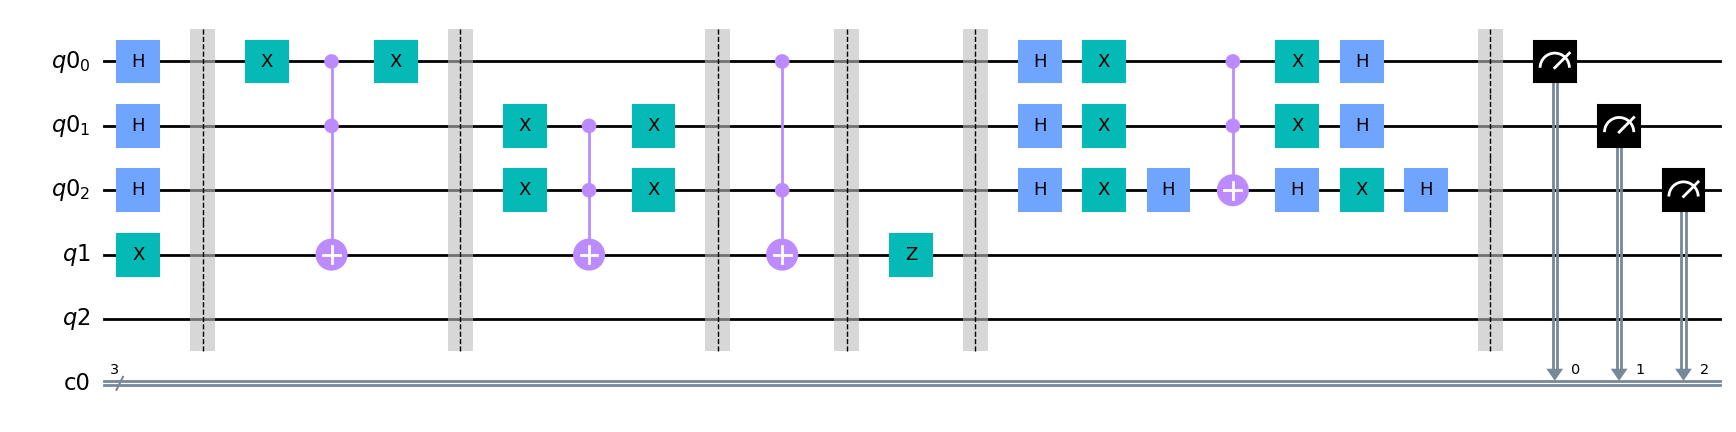

In [2]:
#Quantum Grovers search for first two clauses
sat_problem1 = [[1,-2,0],[0,2,3],[-1,0,-3]]
qc = sat3_var3(sat_problem1)
qc.draw('mpl')

In [7]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
soln = []
for key,value in counts.items():
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max 2 values from the dictionary:", quant_soln)

Measurement results: {'110': 57, '111': 62, '011': 324, '101': 60, '001': 67, '010': 66, '000': 66, '100': 322}
Max 2 values from the dictionary: ['110', '001']


In [4]:
original_list = ['011', '100']

# Flipping the elements
flipped_list = [element[::-1] for element in original_list]
flipped_list

['110', '001']

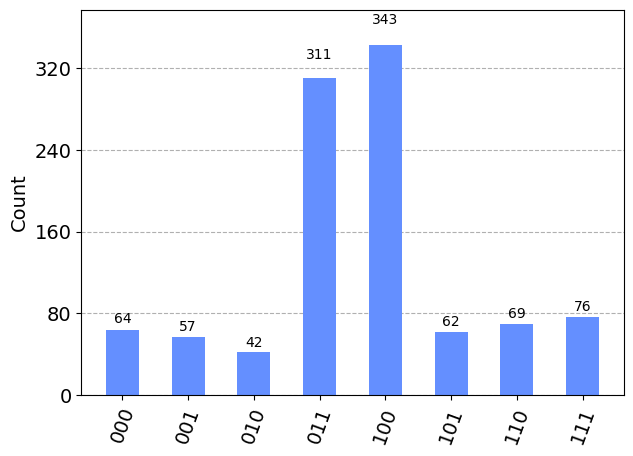

In [5]:
plot_histogram(counts)

In [6]:
#Classical Part
sat_problem2 = [[-1,-2,3]]

def classical_sat_checker(sat_formula,quantum_solution):
    for sat_clause in sat_formula:                              #for each clause in a classical part of sat_formula
        for k in range(len(quantum_solution)):                  #for each solution from set of quantum valid solutions
            result = []
            for variable,quant_variable in zip(sat_clause,list(quantum_solution[k])):   #For a each sat clause and each quantum solution we zip each literals correspondingly
                if variable>0 and int(quant_variable)>0:
                    result.append('yes')
                elif variable<0 and int(quant_variable)==0:
                    result.append('yes')
                else:
                    result = result
            if 'yes' in result:
                sat_solution = quantum_solution[k]                      #Assuming we have only one sat solution
    return(sat_solution)

classical_soln = classical_sat_checker(sat_problem2,flipped_list)
print(classical_soln)                
            
            
                


001
